In [ ]:
!pip install datasets
!pip install --upgrade transformers

In [2]:
from datasets import load_dataset
from datasets import Audio

In [7]:

dataset = load_dataset("facebook/voxpopuli", name="en_accented", split="test", streaming=True, trust_remote_code=True)

In [9]:
next(iter(dataset))

{'audio_id': '20111116-0900-PLENARY-8-en_20111116-16:02:33_0',
 'language': 16,
 'audio': {'path': 'test_part_0/20111116-0900-PLENARY-8-en_20111116-16:02:33_0.wav',
  'array': array([-0.01571655, -0.00256348,  0.00823975, ..., -0.00466919,
         -0.00466919, -0.00241089]),
  'sampling_rate': 16000},
 'raw_text': 'President are the relations of the European union with the United States of America among the most important stabilizing factors that',
 'normalized_text': 'president are the relations of the european union with the united states of america among the most important stabilizing factors that',
 'gender': 'na',
 'speaker_id': '33997',
 'is_gold_transcript': True,
 'accent': 'en_ro'}

In [13]:
dataset_head = dataset.take(4)
data_list = list(dataset_head)

In [14]:
data_list[2]

{'audio_id': '20181115-0900-PLENARY-en_20181115-11:18:17_3',
 'language': 16,
 'audio': {'path': 'test_part_0/20181115-0900-PLENARY-en_20181115-11:18:17_3.wav',
  'array': array([ 0.03717041,  0.08773804,  0.12280273, ..., -0.11514282,
         -0.08380127, -0.09283447]),
  'sampling_rate': 16000},
 'raw_text': 'The job constitution there is nothing about a free',
 'normalized_text': 'the job constitution there is nothing about a free',
 'gender': 'na',
 'speaker_id': '124706',
 'is_gold_transcript': True,
 'accent': 'en_cs'}

# Plot this example’s waveform and spectrogram.

In [16]:
import matplotlib.pyplot as plt
import librosa.display
import librosa

In [18]:
array, sampling_rate = data_list[2]["audio"]["array"], data_list[2]["audio"]["sampling_rate"]

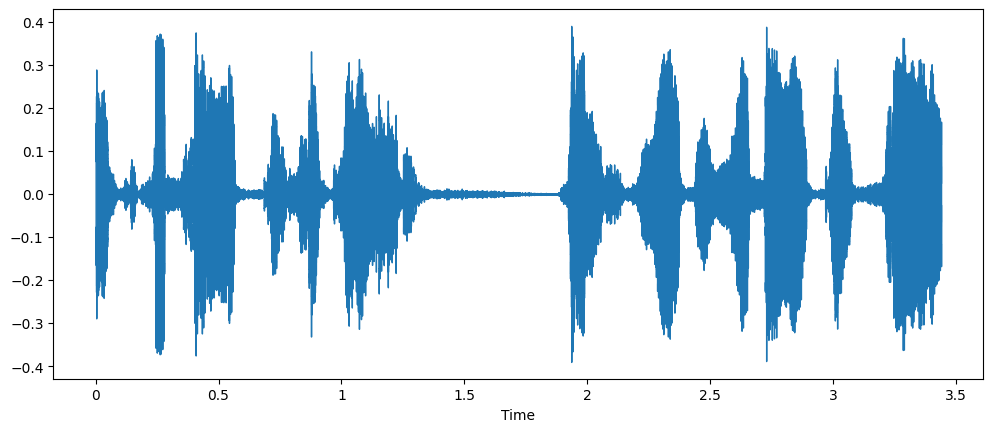

In [19]:

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

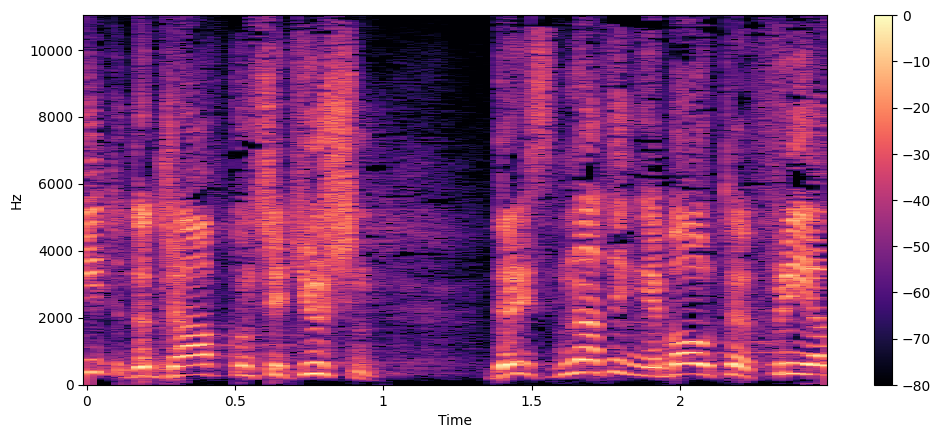

In [20]:
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [21]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You sho

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

In [22]:
asr(array)

{'text': "AT THE JAFT CONSTITUTION THERE'S NOTHING ABOUT THE FREE"}

In [24]:
data_list[2]["raw_text"]

'The job constitution there is nothing about a free'

In [25]:
from IPython.display import Audio

Audio(array, rate=sampling_rate)